# Huffman Coding

Huffman code is a particular type of optimal prefix code that is commonly used for lossless data compression. 
It will be easier to find the letter A than the letter Z, so attempted to encode the letters more frequently, such as A, with shorter binary codes than those used for Z, in this way the most frequent letters in a text are replaced by shorter bit codes.

In [1]:
import math
import matplotlib.pyplot as plt

In [25]:
n = int(input("enter the number of char: "))
# 10 

In [15]:
def open_text(url):
    text=''
    with open(url,'r') as file:
        text=file.read()
    return text[0:n]


class NodeTree(object):
    def __init__(self, left=None, right=None):
        self.left = left
        self.right = right

    def children(self):
        return (self.left, self.right)

    def nodes(self):
        return (self.left, self.right)

    def __str__(self):
        return "%s_%s" % (self.left, self.right)



def huffmanCodeTree(node, left=True, binString=""):
    if type(node) is str:
        return {node: binString}
    (l, r) = node.children()
    d = dict()
    d.update(huffmanCodeTree(l, True, binString + "0"))
    d.update(huffmanCodeTree(r, False, binString + "1"))
    return d

In [16]:
entropy_list=[]
space=[]
L_list=[] 



string=open_text('/Users/Dario/Desktop/Matlab/HW 2/text_Huffman.txt')


freq = {}
for c in string:
    if c in freq:
        freq[c] += 1
    else:
        freq[c] = 1

prob=[i/n for i in freq.values()]
char=[i for i in freq.keys()]

freq=dict(zip(char,prob))

entropy=-(sum([k * math.log(k) for k in freq.values()]))

freq = sorted(freq.items(), key=lambda x: (x[1]), reverse=True)

nodes = freq


while len(nodes) > 1:
    
    #prendo l'ultimo oggetto di nodes
    key1, c1 = nodes[-1]
    #prendo il penultimo oggetto di nodes
    key2, c2 = nodes[-2]
    
    #rimuovo questi due oggetti da nodes
    nodes = nodes[:-2]
    
    #con la classe NodeTree accorpo i due oggetti in un unico oggetto.
    node = NodeTree(key1, key2)
    #aggiungo questo nuovo oggetto 'accorpato' alla lista Nodes
    nodes.append((node, c1 + c2))
    # rifaccio il sort della lista e ricomincio
    nodes = sorted(nodes, key=lambda x: x[1], reverse=True)

    
huffmanCode = huffmanCodeTree(nodes[0][0])


prob_times_lengthchar=[] #sum of pi * li(length of bit of each char)


print (" Char | Freq  | Huffman code ")
print ("-----------------------------")
hauffman_bit=0
#prob_times_lengthchar=[] #sum of pi * li(length of bit of each char)
for char, frequency in freq:
    print (" %-4r | %f | %12s" % (char, frequency, huffmanCode[char]))
    hauffman_bit+=len(huffmanCode[char])
    prob_times_lengthchar.append(len(huffmanCode[char])*frequency)


L=sum(prob_times_lengthchar)
L_list.append(L)
entropy_list.append(entropy)

hash_bit=n*8
save_space=(hauffman_bit/hash_bit)*100

print('Hash bit: '+str(hash_bit))
print('Huffman bit: '+str(hauffman_bit))
print('Percentage of space recovered with Huffman: ',str(round(save_space))+'%')


 Char | Freq  | Huffman code 
-----------------------------
 ' '  | 0.180000 |           00
 'o'  | 0.120000 |          100
 'd'  | 0.100000 |          010
 'r'  | 0.080000 |         1011
 'w'  | 0.060000 |         0111
 'e'  | 0.060000 |         0110
 'a'  | 0.040000 |        11101
 's'  | 0.040000 |        11100
 'i'  | 0.040000 |        11111
 'n'  | 0.040000 |        11110
 'y'  | 0.040000 |        11001
 'l'  | 0.040000 |        11000
 'T'  | 0.020000 |       101001
 'v'  | 0.020000 |       101000
 'g'  | 0.020000 |       101011
 ','  | 0.020000 |       101010
 '\n' | 0.020000 |       110101
 'A'  | 0.020000 |       110100
 'I'  | 0.020000 |       110111
 'c'  | 0.020000 |       110110
Hash bit: 400
Huffman bit: 98
Percentage of space recovered with Huffman:  24%


# Let's try for a list of number of char

In [18]:
input_number=list(map(int, input("enter a list of number of char: ").split())) #731 max length
# 10 50 200 731

In [19]:
entropy_list=[]
space=[]
L_list=[]

for n in input_number:

    
    string=open_text('/Users/Dario/Desktop/Matlab/HW 2/text_Huffman.txt')

    
    freq = {}
    for c in string:
        if c in freq:
            freq[c] += 1
        else:
            freq[c] = 1
    
    prob=[i/n for i in freq.values()]
    char=[i for i in freq.keys()]   
    freq=dict(zip(char,prob))
    
    #entropy formula -sum(pi*log2(pi))
    entropy=-(sum([k * math.log2(k) for k in freq.values()]))
    
    #Sort the frequency table based on occurrence this will also convert the
    #dict to a list of tuples
    freq = sorted(freq.items(), key=lambda x: (x[1]), reverse=True)

    
    nodes = freq
    
    while len(nodes) > 1:
        key1, c1 = nodes[-1]
        key2, c2 = nodes[-2]
        nodes = nodes[:-2]
        node = NodeTree(key1, key2)
        nodes.append((node, c1 + c2))
        # Re-sort the list
        nodes = sorted(nodes, key=lambda x: x[1], reverse=True)
    
    
    huffmanCode = huffmanCodeTree(nodes[0][0])
    
    prob_times_lengthchar=[] 
    hauffman_bit=0
    for char, frequency in freq:
        hauffman_bit+=len(huffmanCode[char])
        prob_times_lengthchar.append(len(huffmanCode[char])*frequency)
    
    L=sum(prob_times_lengthchar) #sum of pi * li(length of bit of each char)
    L_list.append(L)
    hash_bit=n*8
    save_space=100-(hauffman_bit/hash_bit)*100
    space.append(save_space)
    
    entropy_list.append(entropy)
    
    values=[]
    for i in range(len(entropy_list)):
        value=L_list[i]/entropy_list[i]
        # L(n) / entropy
        values.append(value)

In the plot below we show  how as the number of char increases, the saving percentage over the original message with **Hauffman** increases, we compute the following calculation:

$save_{space}=\bigg(100-\frac{Hauffman_{bit}}{Hash_{bit}}\bigg)\cdot 100$

So it means that:

+ if we choose 3 like number of char the the saving percentage over the original message will be of $79\%$
+ if we if we choose 100 like number of char the the saving percentage over the original message will be of $85\%$

In [7]:
import seaborn as sns

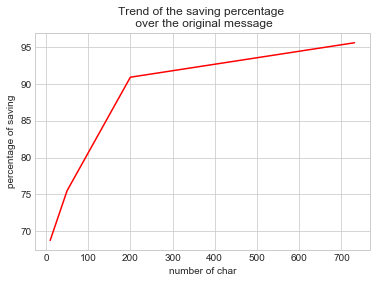

In [20]:
sns.set_style("whitegrid")
plt.plot(input_number,space,color='red')
plt.title('Trend of the saving percentage \n over the original message')
plt.xlabel('number of char')
plt.ylabel('percentage of saving')
plt.show()

At this point we are able to display another plot which represents the relationship between:
+  $\tilde{L}_n$
+  $H(S_n)$

Where:
1. $\tilde{L}_n=\sum_{i=1}^n p_i \cdot l_i$ 
    
    + $i=char_i$
    + $p=\frac{frequence(char_i)}{\text{n° of tot.char}}$
    + $l_i$ $\rightarrow$ length in **Hauffman** bit of $char_i$
 
2. $H(S_n)=-\sum_{i=1}^n p_i \cdot log_2(p_i)$ 

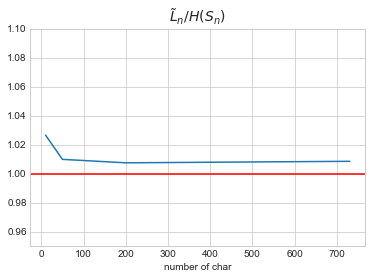

In [21]:
sns.set_style("whitegrid")
plt.plot(input_number,values)
plt.ylim(0.95,1.1)
plt.title(r'$\tilde L_n /H(S_n)$',fontsize=14)
plt.xlabel('number of char')
plt.axhline(1, color='r')
plt.show()